# Pima Indian Diabetes Prediction

The aims of this project is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Logistic Regression and k-Nearest Neighbors are used as the prediction method.

***
Variables included in the dataset : 

* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age
* Outcome

***

Dataset source : https://www.kaggle.com/uciml/pima-indians-diabetes-database

Import Libraries

In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

pd.set_option("precision", 3)
plt.style.use("fivethirtyeight")

Load the dataset

In [2]:
df = pd.read_csv("dataset/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It can be seen that all variables in this dataset is in numeric values

Generate descriptive statistics of the dataset

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


Show the class distribution

In [5]:
class_dist = df.groupby("Outcome").size()

for index, val in class_dist.iteritems():
    percentage = (val / sum(class_dist) * 100)
    print(f"Class {index} : {val} samples ({percentage:.2f}%)")


Class 0 : 500 samples (65.10%)
Class 1 : 268 samples (34.90%)


We can see that in this dataset, the number of patients who do not suffer from diabetes is greater, namely 500 samples with a percentage of 65.10% of the total sample.

Show the skewness in the dataset

In [6]:
skewness = df.skew()
skewness.to_frame()

,0
Pregnancies,0.902
Glucose,0.174
BloodPressure,-1.844
SkinThickness,0.109
Insulin,2.272
BMI,-0.429
DiabetesPedigreeFunction,1.920
Age,1.130
Outcome,0.635


Calculate the Pearson's correlation of each variables

In [7]:
df.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


Show the histogram plot of each variables

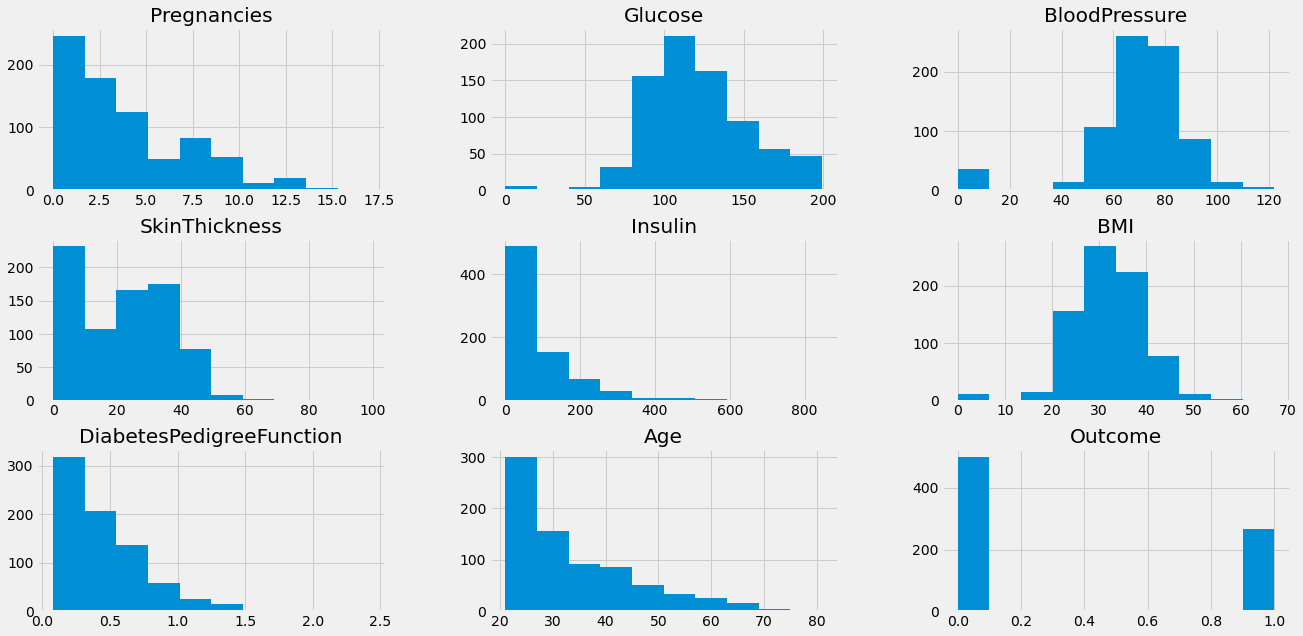

In [8]:
df.hist(figsize=(20,10));

Show the density plot of each variables

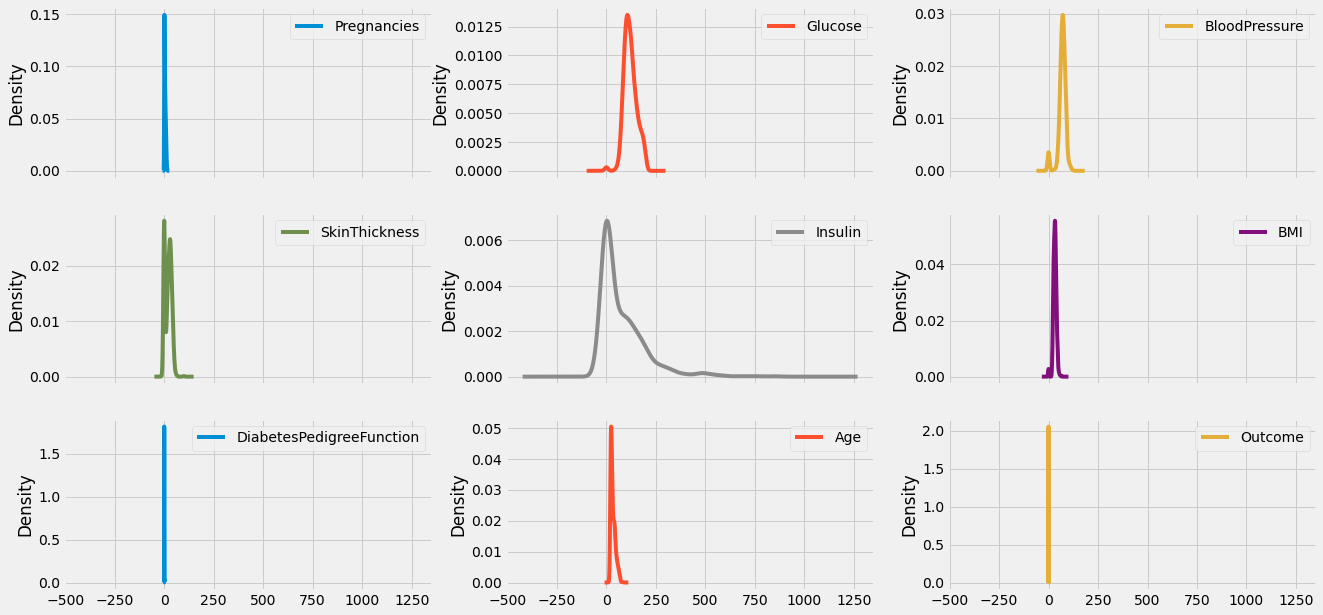

In [9]:
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20,10));

Split the dependent and independent variables in the dataset

In [10]:
X = df.drop(["Outcome"], axis=1)
y = pd.DataFrame(df["Outcome"].copy())

Scales the independent variables

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Split the dataset into the training and the testing set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614, 1) (154, 1)


## Model Training

Train a logistic regression model

In [13]:
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())

LogisticRegression()

Predict the training set


In [14]:
train_pred = clf.predict(X_train)
print(f"Model accuracy on the training set : {accuracy_score(y_train, train_pred)}")


Model accuracy on the training set : 0.7703583061889251


Fine-tuning the model using GridSearchCV

In [15]:
param_grid = {
    "penalty": ["l1", "l2"],
    "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["liblinear"]
}

In [16]:
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='accuracy')

In [17]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(mean_score, params)

0.6531200423056583 {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.7523532522474881 {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.6987043892120572 {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.7654151242728715 {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.7606028556319407 {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.76544156530936 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.76544156530936 {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.7670544685351666 {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.7670544685351666 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.7670544685351666 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.7670544685351666 {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.7670544685351666 {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.7670544685351666 {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
0.7670544685351666 {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [18]:
print(f"Best Score: {grid_search.best_score_:.3f}")
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Score: 0.767
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [19]:
grid_search_predict = grid_search.predict(X_train)
print(f"Model accuracy on the training set after parameter tuning : {accuracy_score(y_train, grid_search_predict):.3f}")

Model accuracy on the training set after parameter tuning : 0.770


The fine-tuning process did not succeed in increasing the accuracy of our model, despite changes in the hyperparameters used

Visualize the confusion matrix of the logistic regression model on the training set

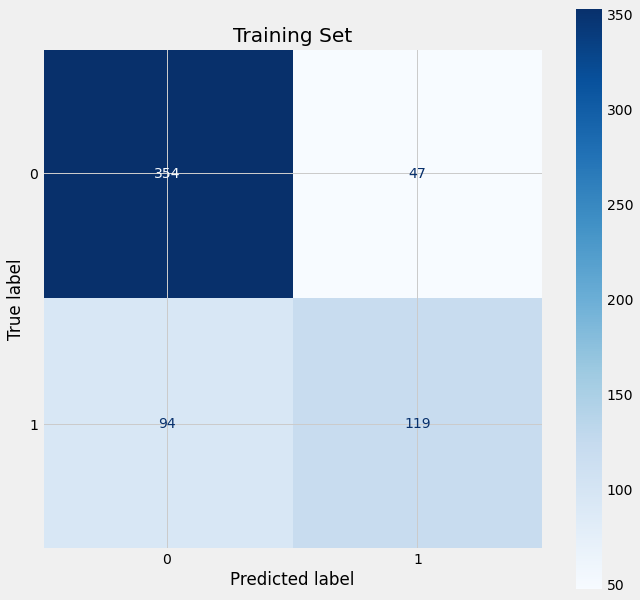

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Training Set')
plot_confusion_matrix(grid_search, X_train, y_train, cmap=plt.cm.Blues, ax=ax)
plt.show()

Use our fine-tuned model to predict the test set

In [21]:
test_pred = grid_search.predict(X_test)
print('Model accuracy on the testing set : {:.3f}'.format(accuracy_score(y_test, test_pred)))

Model accuracy on the testing set : 0.753


Show the classification report of logistic regression model on the testing set

In [22]:
print('Classification Report of Logistic Regression: \n\n {}'.format(classification_report(y_test, test_pred)))

Classification Report of Logistic Regression: 

               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Visualize the confusion matrix of the logistic regression model on the testing set

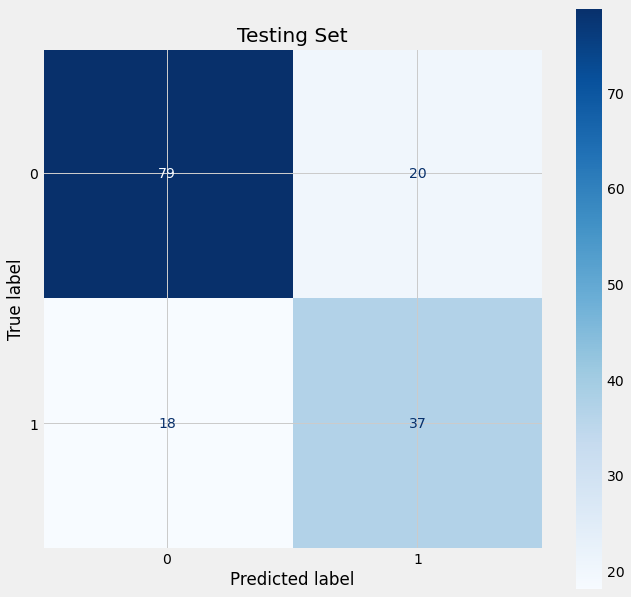

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Testing Set')
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

Save the model

In [24]:
filename = 'model/diabetes_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## Conclusion

The diabetes prediction model that was built using logistic regression was successfully trained with a decent accuracy of 0.770. This model is also quite good at predicting the testing set, with an accuracy of 0.753. In this project, we have done a fine-tuning process to find the best hyperparameter to build the logistic regression model. However, the parameter search results through the GridSearchCV process did not improve the accuracy of the model.